#Project Housing Prices

In [1]:
from io import StringIO

import pandas as pd
import numpy as np
import requests
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

#Importing the two data sets test and train.
#Data sets obtained from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
url_test='https://raw.githubusercontent.com/peterkoebel/ProjectHousingPrices/master/test.csv'
url_train='https://raw.githubusercontent.com/peterkoebel/ProjectHousingPrices/master/train.csv'
s_test=requests.get(url_test).text
s_train=requests.get(url_train).text

data_test = pd.read_csv(StringIO(s_test))
data_train = pd.read_csv(StringIO(s_train))

In [ ]:
#Checking the shapes of the data sets.

In [3]:
print (data_test.shape,data_train.shape)

(1459, 80) (1460, 81)


#Comparing the columns of the data sets.

In [4]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [5]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#The difference between the columns of the two data sets is that the train data set has an extra column 'SalePrice'.

#Now we can combine the two data sets

In [6]:
data = data_train.append(data_test,ignore_index=True)

#Let's review the new combined data set.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0
2ndFlrSF,2919.0,336.483727,428.701456,0.0,0.0,0.0,704.0,2065.0
3SsnPorch,2919.0,2.602261,25.188169,0.0,0.0,0.0,0.0,508.0
BedroomAbvGr,2919.0,2.860226,0.822693,0.0,2.0,3.0,3.0,8.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
EnclosedPorch,2919.0,23.098321,64.244246,0.0,0.0,0.0,0.0,1012.0


#We'll fill the empty fields for the 'SalePrice' column with the average of the values.

In [8]:
data.SalePrice = data.SalePrice.fillna(value = data.SalePrice.mean())

#Next we'll check which columns having missing data fields. As they cause problems in our analysis later.

In [9]:
data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

#Here we'll remove columns that have a large amount of empty fields.

In [10]:
data.drop(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'],axis=1,inplace=True)

#Now we'll look at the information of our columns.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 76 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      29

#Column 'LotFrontage' has a few empty fields. We'll fill them with the average value.

In [12]:
data.LotFrontage = data.LotFrontage.fillna(value = data.LotFrontage.mean())

In [13]:
data.isnull().sum()

1stFlrSF          0
2ndFlrSF          0
3SsnPorch         0
BedroomAbvGr      0
BldgType          0
BsmtCond         82
BsmtExposure     82
BsmtFinSF1        1
BsmtFinSF2        1
BsmtFinType1     79
BsmtFinType2     80
BsmtFullBath      2
BsmtHalfBath      2
BsmtQual         81
BsmtUnfSF         1
CentralAir        0
Condition1        0
Condition2        0
Electrical        1
EnclosedPorch     0
ExterCond         0
ExterQual         0
Exterior1st       1
Exterior2nd       1
Fireplaces        0
Foundation        0
FullBath          0
Functional        2
GarageArea        1
GarageCars        1
                 ..
LotConfig         0
LotFrontage       0
LotShape          0
LowQualFinSF      0
MSSubClass        0
MSZoning          4
MasVnrArea       23
MasVnrType       24
MiscVal           0
MoSold            0
Neighborhood      0
OpenPorchSF       0
OverallCond       0
OverallQual       0
PavedDrive        0
PoolArea          0
RoofMatl          0
RoofStyle         0
SaleCondition     0


#We'll remove any rows that have empty fields now.

In [14]:
data.dropna(inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 0 to 2918
Data columns (total 76 columns):
1stFlrSF         2657 non-null int64
2ndFlrSF         2657 non-null int64
3SsnPorch        2657 non-null int64
BedroomAbvGr     2657 non-null int64
BldgType         2657 non-null object
BsmtCond         2657 non-null object
BsmtExposure     2657 non-null object
BsmtFinSF1       2657 non-null float64
BsmtFinSF2       2657 non-null float64
BsmtFinType1     2657 non-null object
BsmtFinType2     2657 non-null object
BsmtFullBath     2657 non-null float64
BsmtHalfBath     2657 non-null float64
BsmtQual         2657 non-null object
BsmtUnfSF        2657 non-null float64
CentralAir       2657 non-null object
Condition1       2657 non-null object
Condition2       2657 non-null object
Electrical       2657 non-null object
EnclosedPorch    2657 non-null int64
ExterCond        2657 non-null object
ExterQual        2657 non-null object
Exterior1st      2657 non-null object
Exterior2nd      26

#Another review of our columns.

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2657.0,1171.272864,391.314795,407.0,888.0,1094.000000,1403.00000,5095.0
2ndFlrSF,2657.0,344.133609,432.023840,0.0,0.0,0.000000,718.00000,2065.0
3SsnPorch,2657.0,2.724878,25.945740,0.0,0.0,0.000000,0.00000,508.0
BedroomAbvGr,2657.0,2.855100,0.784645,0.0,2.0,3.000000,3.00000,6.0
BsmtFinSF1,2657.0,465.750470,457.538859,0.0,0.0,403.000000,758.00000,5644.0
BsmtFinSF2,2657.0,53.051562,174.902139,0.0,0.0,0.000000,0.00000,1526.0
BsmtFullBath,2657.0,0.449003,0.521864,0.0,0.0,0.000000,1.00000,2.0
BsmtHalfBath,2657.0,0.063606,0.247161,0.0,0.0,0.000000,0.00000,2.0
BsmtUnfSF,2657.0,572.687241,435.820072,0.0,240.0,476.000000,810.00000,2336.0
EnclosedPorch,2657.0,22.052315,63.903282,0.0,0.0,0.000000,0.00000,1012.0


#Let's look at some statistics of the lot area of the houses.

In [17]:
print ("Min value of LotArea is:",data.LotArea.min(),"and",data.LotArea.max(),"is the Max value")
print ("The average value of LotArea is",data.LotArea.mean())
print ("The middle value of LotArea is",data.LotArea.median())

Min value of LotArea is: 1300 and 215245 is the Max value
The average value of LotArea is 10238.100112909297
The middle value of LotArea is 9560.0


#Here are some statistics of another important column the sale price of the houses.

In [18]:
print ("Min value of LotArea is:",data.SalePrice.min(),"and",data.SalePrice.max(),"is the Max value")
print ("The average value of LotArea is",data.SalePrice.mean())
print ("The middle value of LotArea is",data.SalePrice.median())

Min value of LotArea is: 35311.0 and 755000.0 is the Max value
The average value of LotArea is 183862.37199076766
The middle value of LotArea is 180921.19589041095


#Next we'll generate a Heatmap to view the connections between the columns.

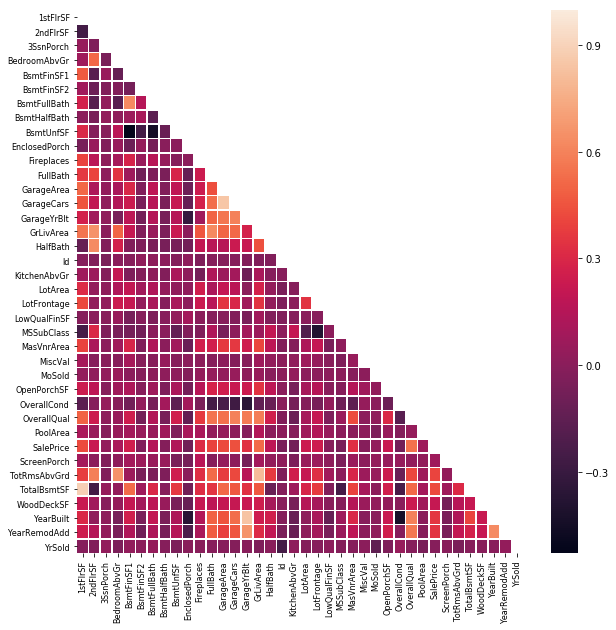

In [21]:
corrs = data.corr()

fig, ax = plt.subplots(figsize=(10,10))

mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corrs, mask=mask, linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

plt.show()

#Now we'll look at the distribution of the lot area.

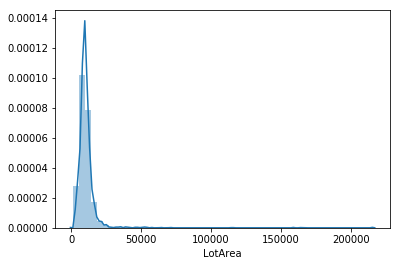

In [22]:
sns.distplot(data.LotArea);

#Let's normalize the distribution, to get a better look.

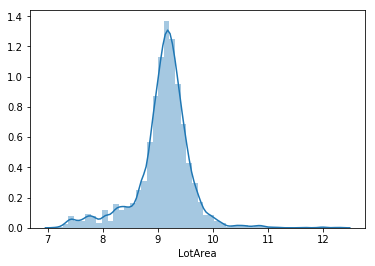

In [24]:
data['LotArea'] = np.log(data['LotArea'])
sns.distplot(data['LotArea']);

#Here we'll look at the normal distribution of the sale price, only using the train data set. As many of the fields in the combined data set are just the average and aren't useful for this analysis.

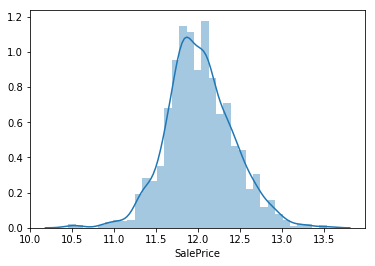

In [26]:
data_train['SalePrice'] = np.log(data_train['SalePrice'])
sns.distplot(data_train['SalePrice']);

#Lastly we'll generate some pairplots to review trends for pairs of columns.

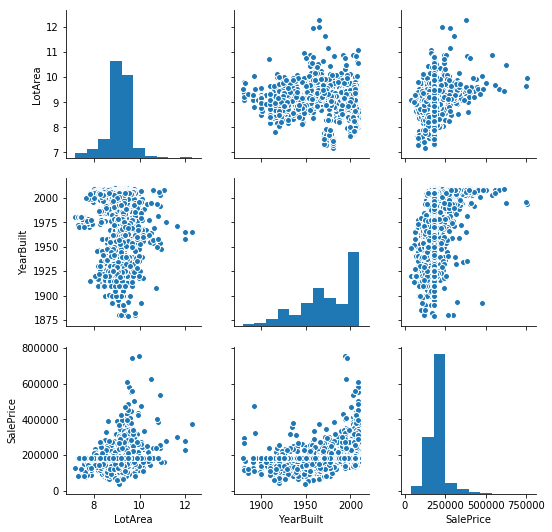

In [29]:
columns_pairplots = data[['LotArea', 'YearBuilt', 'SalePrice']]
sns.pairplot(columns_pairplots);

#In the bottom left graph, we can see that as the lot area increases not surprisingly the sale price tends to increase as well. With a few outliers.

#Looking at the bottom middle graph, we observe again not surpising that the newer the house the higher the sale price. There are a handful of outliers.

#Reviewing the top middle graph, we see that newer homes have a higher range of lot areas.